In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # ÌòπÏùÄ Îã§Î•∏ ÏÑ§ÏπòÌïú Nanum Ìè∞Ìä∏ ÏÇ¨Ïö©
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
yeomi_review = db['yeomi_review']
yeomi_review = yeomi_review.find()
yeomi_review = pd.DataFrame(yeomi_review)
kto9suk9suk_review = db['kto9suk9suk_review']
kto9suk9suk_review = kto9suk9suk_review.find()
kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## Ïó¨ÌñâÏóê ÎØ∏ÏπòÎã§ ÌéòÏù¥ÏßÄÏóêÏÑú Íµ≠ÎÇ¥ Ïó¨Ìñâ Í≤åÏãúÍ∏ÄÎßå Í∞ÄÏ†∏Ïò§Í∏∞

In [4]:
list_region = ['#Í∞ïÏõê','#Í≤ΩÍ∏∞','#Í≤ΩÎÇ®','#Í≤ΩÎ∂Å','#Í¥ëÏ£º','#ÎåÄÍµ¨','#ÎåÄÏ†Ñ','#Î∂ÄÏÇ∞','#ÏÑúÏö∏','#ÏÑ∏Ï¢Ö','#Ïö∏ÏÇ∞','#Ïù∏Ï≤ú','#Ï†ÑÎÇ®','#Ï†ÑÎ∂Å','#Ï†úÏ£º','#Ï∂©ÎÇ®','#Ï∂©Î∂Å','#Í∞ïÎ¶â','#Í≥†ÏÑ±','#ÎèôÌï¥','#ÏÇºÏ≤ô','#ÏÜçÏ¥à','#ÏñëÍµ¨','#ÏñëÏñë','#ÏòÅÏõî','#ÏõêÏ£º','#Ïù∏Ï†ú','#Ï†ïÏÑ†','#Ï≤†Ïõê','#Ï∂òÏ≤ú','#ÌÉúÎ∞±','#ÌèâÏ∞Ω','#ÌôçÏ≤ú','#ÌôîÏ≤ú','#Ìö°ÏÑ±','#Í∞ÄÌèâ','#Í≥†Ïñë','#Í≥ºÏ≤ú','#Í¥ëÎ™Ö','#Í¥ëÏ£º','#Íµ¨Î¶¨','#Íµ∞Ìè¨','#ÍπÄÌè¨','#ÎÇ®ÏñëÏ£º','#ÎèôÎëêÏ≤ú','#Î∂ÄÏ≤ú','#ÏÑ±ÎÇ®','#ÏàòÏõê','#ÏãúÌù•','#ÏïàÏÇ∞','#ÏïàÏÑ±','#ÏïàÏñë','#ÏñëÏ£º','#ÏñëÌèâ','#Ïó¨Ï£º','#Ïó∞Ï≤ú','#Ïò§ÏÇ∞','#Ïö©Ïù∏','#ÏùòÏôï','#ÏùòÏ†ïÎ∂Ä','#Ïù¥Ï≤ú','#ÌååÏ£º','#ÌèâÌÉù','#Ìè¨Ï≤ú','#ÌïòÎÇ®','#ÌôîÏÑ±','#Í±∞Ï†ú','#Í±∞Ï∞Ω','#Í≥†ÏÑ±','#ÍπÄÌï¥','#ÎÇ®Ìï¥','#Î∞ÄÏñë','#ÏÇ¨Ï≤ú','#ÏÇ∞Ï≤≠','#ÏñëÏÇ∞','#ÏùòÎ†π','#ÏßÑÏ£º','#Ï∞ΩÎÖï','#Ï∞ΩÏõê','#ÌÜµÏòÅ','#ÌïòÎèô','#Ìï®Ïïà','#Ìï®Ïñë','#Ìï©Ï≤ú','#Í≤ΩÏÇ∞','#Í≤ΩÏ£º','#Í≥†Î†π','#Íµ¨ÎØ∏','#ÍπÄÏ≤ú','#Î¨∏Í≤Ω','#Î¥âÌôî','#ÏÉÅÏ£º','#ÏÑ±Ï£º','#ÏïàÎèô','#ÏòÅÎçï','#ÏòÅÏñë','#ÏòÅÏ£º','#ÏòÅÏ≤ú','#ÏòàÏ≤ú','#Ïö∏Î¶â','#Ïö∏ÏßÑ','#ÏùòÏÑ±','#Ï≤≠ÎèÑ','#Ï≤≠ÏÜ°','#Ïπ†Í≥°','#Ìè¨Ìï≠','#Í¥ëÏÇ∞','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#ÏÑúÍµ¨','#Íµ∞ÏúÑ','#ÎÇ®Íµ¨','#Îã¨ÏÑú','#Îã¨ÏÑ±','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#ÏÑúÍµ¨','#ÏàòÏÑ±','#Ï§ëÍµ¨','#ÎåÄÎçï','#ÎèôÍµ¨','#ÏÑúÍµ¨','#Ïú†ÏÑ±','#Ï§ëÍµ¨','#Í∞ïÏÑú','#Í∏àÏ†ï','#Í∏∞Ïû•','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#ÎèôÎûò','#Î∂ÄÏÇ∞ÏßÑ','#Î∂ÅÍµ¨','#ÏÇ¨ÏÉÅ','#ÏÇ¨Ìïò','#ÏÑúÍµ¨','#ÏàòÏòÅ','#Ïó∞Ï†ú','#ÏòÅÎèÑ','#Ï§ëÍµ¨','#Ìï¥Ïö¥ÎåÄ','#Í∞ïÎÇ®','#Í∞ïÎèô','#Í∞ïÎ∂Å','#Í∞ïÏÑú','#Í¥ÄÏïÖ','#Í¥ëÏßÑ','#Íµ¨Î°ú','#Í∏àÏ≤ú','#ÎÖ∏Ïõê','#ÎèÑÎ¥â','#ÎèôÎåÄÎ¨∏','#ÎèôÏûë','#ÎßàÌè¨','#ÏÑúÎåÄÎ¨∏','#ÏÑúÏ¥à','#ÏÑ±Îèô','#ÏÑ±Î∂Å','#ÏÜ°Ìåå','#ÏñëÏ≤ú','#ÏòÅÎì±Ìè¨','#Ïö©ÏÇ∞','#ÏùÄÌèâ','#Ï¢ÖÎ°ú','#Ï§ëÍµ¨','#Ï§ëÎûë','#ÎÇ®Íµ¨','#ÎèôÍµ¨','#Î∂ÅÍµ¨','#Ïö∏Ï£º','#Ï§ëÍµ¨','#Í∞ïÌôî','#Í≥ÑÏñë','#ÎÇ®Îèô','#ÎèôÍµ¨','#ÎØ∏Ï∂îÌôÄ','#Î∂ÄÌèâ','#ÏÑúÍµ¨','#Ïó∞Ïàò','#ÏòπÏßÑ','#Ï§ëÍµ¨','#Í∞ïÏßÑ','#Í≥†Ìù•','#Í≥°ÏÑ±','#Í¥ëÏñë','#Íµ¨Î°Ä','#ÎÇòÏ£ºÏãú','#Îã¥Ïñë','#Î™©Ìè¨','#Î¨¥Ïïà','#Î≥¥ÏÑ±','#ÏàúÏ≤ú','#Ïã†Ïïà','#Ïó¨Ïàò','#ÏòÅÍ¥ë','#ÏòÅÏïî','#ÏôÑÎèÑ','#Ïû•ÏÑ±','#Ïû•Ìù•','#ÏßÑÎèÑ','#Ìï®Ìèâ','#Ìï¥ÎÇ®','#ÌôîÏàú','#Í≥†Ï∞Ω','#Íµ∞ÏÇ∞','#ÍπÄÏ†ú','#ÎÇ®Ïõê','#Î¨¥Ï£º','#Î∂ÄÏïà','#ÏàúÏ∞Ω','#ÏôÑÏ£º','#ÏùµÏÇ∞','#ÏûÑÏã§','#Ïû•Ïàò','#Ï†ÑÏ£º','#Ï†ïÏùç','#ÏßÑÏïà','#ÏÑúÍ∑ÄÌè¨','#Ï†úÏ£º','#Í≥ÑÎ£°','#Í≥µÏ£º','#Í∏àÏÇ∞','#ÎÖºÏÇ∞','#ÎãπÏßÑ','#Î≥¥Î†π','#Î∂ÄÏó¨','#ÏÑúÏÇ∞','#ÏÑúÏ≤ú','#ÏïÑÏÇ∞','#ÏòàÏÇ∞','#Ï≤úÏïà','#Ï≤≠Ïñë','#ÌÉúÏïà','#ÌôçÏÑ±','#Í¥¥ÏÇ∞','#Îã®Ïñë','#Î≥¥ÏùÄ','#ÏòÅÎèô','#Ïò•Ï≤ú','#ÏùåÏÑ±','#Ï†úÏ≤ú','#Ï¶ùÌèâ','#ÏßÑÏ≤ú','#Ï≤≠Ï£º','#Ï∂©Ï£º']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

_id  \
201      65f9bf4f08bfcc46ca193606   
202      65f9bf4f08bfcc46ca193607   
203      65f9bf4f08bfcc46ca193608   
204      65f9bf5008bfcc46ca193609   
205      65f9bf5008bfcc46ca19360a   
...                           ...   
1152424  662b80e0f231019cd5b61943   
1152425  662b80e0f231019cd5b61944   
1152426  662b80e0f231019cd5b61945   
1152427  662b80e1f231019cd5b61946   
1152428  662b80e1f231019cd5b61947   

                                              card_content     card_date  \
201      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
202      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
203      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
204      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
205      .\n#Ïù∏Ï†ú, #Inje, #ÎåÄÌïúÎØºÍµ≠, #Korea\n.\n.\nÏûêÏûëÎÇòÎ¨¥ Ïà≤ Î∂ÑÏúÑÍ∏∞...  2018ÎÖÑ 1Ïõî 22Ïùº   
...                                                    ...           ...   
1152424  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152425  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152426  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152427  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
1152428  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

        card_like card_watch  check_point  \
201          7447             BePBx_qBqwm   
202          7447             BePBx_qBqwm   
203          7447             BePBx_qBqwm   
204          7447             BePBx_qBqwm   
205          7447             BePBx_qBqwm   
...           ...        ...          ...   
1152424       123             C6OA2Fbhy5r   
1152425       123             C6OA2Fbhy5r   
1152426       123             C6OA2Fbhy5r   
1152427       123             C6OA2Fbhy5r   
1152428       123             C6OA2Fbhy5r   

                                    review_content   review_date  
201                                            NaN           NaN  
202                                   @shorokhofff  2018ÎÖÑ 6Ïõî 22Ïùº  
203                @soye0114 Ïó¨Í∏∞ Îã§ÎãàÏóò ÎÆ§ÎπÑ Ï∞çÏùÄÍ≥≥Ïù∏Í∞Ä???!!!  2018ÎÖÑ 2Ïõî 24Ïùº  
204                            @h.a.ing ÏöîÍ∏∞Î¥ê „Öã„Öã„Öã„Öã„Öã„Öã   2018ÎÖÑ 2Ïõî 8Ïùº  
205                        @dal.hye Ïïº ÎÇò Ïó¨Í∏∞ Í∞ÄÍ≥†Ïã∂Ïñ¥„Ö†„Ö†„Ö†  2018ÎÖÑ 1Ïõî 28Ïùº  
...                                            ...           ...  
1152424                                        NaN           NaN  
1152425                                   ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº  
1152426                          ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº  
1152427  ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº  
1152428         @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº  

[473220 rows x 8 columns]

## Íµ¨ÏÑùÍµ¨ÏÑù ÌéòÏù¥ÏßÄÏôÄ Ïó¨ÌñâÏóê ÎØ∏ÏπòÎã§ ÌéòÏù¥ÏßÄÏóêÏÑú Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [5]:
kto9suk9suk_review

_id  \
0       65f99f8608bfcc46ca19351d   
1       65f99f8608bfcc46ca19351e   
2       65f99f8608bfcc46ca19351f   
3       65f99f8808bfcc46ca193520   
4       65f99f8b08bfcc46ca193521   
...                          ...   
125933  662a1fb44a4fe5fadf3f71ee   
125934  662f1d43b33c9dc30aa95f3f   
125935  662f1d4bb33c9dc30aa95f40   
125936  662f22cb5cb025207273f6f6   
125937  662f22d15cb025207273f6f7   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
3       Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
4       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
...                                                   ...           ...   
125933  Ïã†Í∑ú Í∞úÏû• Í∏∞ÎÖê Î¨¥Î£å Ïö¥ÏòÅ Ï§ë(~5/6)‚Äº ÏßúÎ¶øÌï® ÏµúÍ≥†Ïù∏üòÜ ÍπÄÏ≤ú #ÏÇ¨Í≥ÑÏ†àÏç∞Îß§Ïû•\n\...  2024ÎÖÑ 4Ïõî 25Ïùº   
125934  Ï†úÏ£ºÎèÑ ÌÜ†Ï¢Ö ÏÜå, ÌùëÌïúÏö∞ ÏÇ¥Ïßù Î†àÏñ¥Î°ú ÏùµÌòÄ Ìïú ÏûÖÏóê ÏèòÏò•~!\nÏ∞∏ ÏàØÎ∂àÎ°ú Íµ¨Ïõå ÎçîÏö±...   2014ÎÖÑ 8Ïõî 5Ïùº   
125935  Î≤îÏÑ†Ïùò ÌúòÌô©Ï∞¨ÎûÄÌïú Ïã§Î£®Ïó£Ïù¥ ÏòÅÎçï ÎåÄÍ≤åÎ•º Î®πÏúºÎü¨ Ï∞æÎäî Î∞©Î¨∏Í∞ùÏùÑ Î∞òÍ∏∞Îäî Ïù¥Í≥≥ +_+ ÎåÄ...  2014ÎÖÑ 8Ïõî 26Ïùº   
125936  Ï†úÏ£ºÎèÑ ÌÜ†Ï¢Ö ÏÜå, ÌùëÌïúÏö∞ ÏÇ¥Ïßù Î†àÏñ¥Î°ú ÏùµÌòÄ Ìïú ÏûÖÏóê ÏèòÏò•~!\nÏ∞∏ ÏàØÎ∂àÎ°ú Íµ¨Ïõå ÎçîÏö±...   2014ÎÖÑ 8Ïõî 5Ïùº   
125937  Î≤îÏÑ†Ïùò ÌúòÌô©Ï∞¨ÎûÄÌïú Ïã§Î£®Ïó£Ïù¥ ÏòÅÎçï ÎåÄÍ≤åÎ•º Î®πÏúºÎü¨ Ï∞æÎäî Î∞©Î¨∏Í∞ùÏùÑ Î∞òÍ∏∞Îäî Ïù¥Í≥≥ +_+ ÎåÄ...  2014ÎÖÑ 8Ïõî 26Ïùº   

       card_like card_watch  check_point review_content   review_date  
0             50              pkcKuIzTJ0            NaN           NaN  
1             50              pkcKuIzTJ0       Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº  
2             50              pkcKuIzTJ0        Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº  
3             87              pk8YhwTTDR            NaN           NaN  
4             42              qQx_BQTTBH            NaN           NaN  
...          ...        ...          ...            ...           ...  
125933       106             C6LYPKTSzun              üõ∑  2024ÎÖÑ 4Ïõî 25Ïùº  
125934        81              rT9rIsTTNs            NaN           NaN  
125935       100              sJhwZxzTCf            NaN           NaN  
125936        81              rT9rIsTTNs            NaN           NaN  
125937       100              sJhwZxzTCf            NaN           NaN  

[125938 rows x 8 columns]

In [9]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns

_id  \
0       65f99f8608bfcc46ca19351d   
1       65f99f8608bfcc46ca19351e   
2       65f99f8608bfcc46ca19351f   
3       65f99f8808bfcc46ca193520   
4       65f99f8b08bfcc46ca193521   
...                          ...   
599153  662b80e0f231019cd5b61943   
599154  662b80e0f231019cd5b61944   
599155  662b80e0f231019cd5b61945   
599156  662b80e1f231019cd5b61946   
599157  662b80e1f231019cd5b61947   

                                             card_content     card_date  \
0       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
2       ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
3       Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
4       Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
...                                                   ...           ...   
599153  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599154  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599155  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599156  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   
599157  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

       card_like card_watch  check_point  \
0             50              pkcKuIzTJ0   
1             50              pkcKuIzTJ0   
2             50              pkcKuIzTJ0   
3             87              pk8YhwTTDR   
4             42              qQx_BQTTBH   
...          ...        ...          ...   
599153       123             C6OA2Fbhy5r   
599154       123             C6OA2Fbhy5r   
599155       123             C6OA2Fbhy5r   
599156       123             C6OA2Fbhy5r   
599157       123             C6OA2Fbhy5r   

                                   review_content   review_date  
0                                             NaN           NaN  
1                                        Ï†ïÎßê ÏïÑÎ¶ÑÎã§ÏõåÏöî   2014ÎÖÑ 7Ïõî 9Ïùº  
2                                         Î©ãÏßÑ ÏÑ¨Ïù¥ÎÑ§Ïöî  2014ÎÖÑ 6Ïõî 24Ïùº  
3                                             NaN           NaN  
4                                             NaN           NaN  
...                                           ...           ...  
599153                                        NaN           NaN  
599154                                   ÎØ∏Ï∏†Î∞î Ï¢ãÏäµÎãàÎãπ  2024ÎÖÑ 4Ïõî 26Ïùº  
599155                          ÏôÄ Ïù¥Ï†ú Í≥ß Ïû•ÎØ∏Í≥µÏõêÏùò ÏãúÏ¶åÏù¥Îã§  2024ÎÖÑ 4Ïõî 26Ïùº  
599156  ÌòπÏãú Ïó¨Í∏∞ Îã§ Í∞ÄÎ≥∏ ÏÇ¨Îûå ÏûàÏñ¥? Ïñ¥ÎîîÍ∞Ä Ï†§ Ï¢ãÏïòÎäîÏßÄ Ï∂îÏ≤úÌï¥Ï£ºÎùºÏ§ò~üôãüèª‚Äç‚ôÄÔ∏è  2024ÎÖÑ 4Ïõî 26Ïùº  
599157         @ddohing_ Ïû•ÎØ∏Í≥µÏõê„ÖÖ„ÖÇ„Öã„Öã„Öã Ï°¥ÎÇò Ï™ÑÏ£ΩÏùÑÎªîÌïúÍ±∞ Í∏∞ÏñµÎÇòÎÖ∏  2024ÎÖÑ 4Ïõî 26Ïùº  

[599158 rows x 8 columns]

## Ïñ¥Îäê ÏßÄÏó≠Ïóê Í¥ÄÌïú ÌëúÏãú

In [10]:
region_gw = ['Í∞ïÏõêÎèÑ ','Í∞ïÏõê ','Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ ','#Í∞ïÏõê','#Í∞ïÎ¶â', '#Í≥†ÏÑ±', '#ÎèôÌï¥', '#ÏÇºÏ≤ô', '#ÏÜçÏ¥à', '#ÏñëÍµ¨', '#ÏñëÏñë', '#ÏòÅÏõî', '#ÏõêÏ£º', '#Ïù∏Ï†ú', '#Ï†ïÏÑ†', '#Ï≤†Ïõê', '#Ï∂òÏ≤ú', '#ÌÉúÎ∞±', '#ÌèâÏ∞Ω', '#ÌôçÏ≤ú', '#ÌôîÏ≤ú', '#Ìö°ÏÑ±']
region_gg = ['Í≤ΩÍ∏∞ÎèÑ ','Í≤ΩÍ∏∞ ','#Í≤ΩÍ∏∞','#Í∞ÄÌèâ', '#Í≥†Ïñë', '#Í≥ºÏ≤ú', '#Í¥ëÎ™Ö', '#Íµ¨Î¶¨', '#Íµ∞Ìè¨', '#ÍπÄÌè¨', '#ÎÇ®ÏñëÏ£º', '#ÎèôÎëêÏ≤ú', '#Î∂ÄÏ≤ú', '#ÏÑ±ÎÇ®', '#ÏàòÏõê', '#ÏãúÌù•', '#ÏïàÏÇ∞', '#ÏïàÏÑ±', '#ÏïàÏñë', '#ÏñëÏ£º', '#ÏñëÌèâ', '#Ïó¨Ï£º', '#Ïó∞Ï≤ú', '#Ïò§ÏÇ∞', '#Ïö©Ïù∏', '#ÏùòÏôï', '#ÏùòÏ†ïÎ∂Ä', '#Ïù¥Ï≤ú', '#ÌååÏ£º', '#ÌèâÌÉù', '#Ìè¨Ï≤ú', '#ÌïòÎÇ®', '#ÌôîÏÑ±']
region_gn = ['Í≤ΩÏÉÅÎÇ®ÎèÑ ','Í≤ΩÎÇ® ','#Í≤ΩÎÇ® ','#Í±∞Ï†ú', '#Í±∞Ï∞Ω', '#Í≥†ÏÑ±', '#ÍπÄÌï¥', '#ÎÇ®Ìï¥', '#Î∞ÄÏñë', '#ÏÇ¨Ï≤ú', '#ÏÇ∞Ï≤≠', '#ÏñëÏÇ∞', '#ÏùòÎ†π', '#ÏßÑÏ£º', '#Ï∞ΩÎÖï', '#Ï∞ΩÏõê', 'ÌÜµÏòÅ', '#ÌïòÎèô', '#Ìï®Ïïà', '#Ìï®Ïñë', '#Ìï©Ï≤ú']
region_gb = ['Í≤ΩÏÉÅÎ∂ÅÎèÑ ','Í≤ΩÎ∂Å ','#Í≤ΩÎ∂Å','#Í≤ΩÏÇ∞', '#Í≤ΩÏ£º', '#Í≥†Î†π', '#Íµ¨ÎØ∏', '#ÍπÄÏ≤ú', '#Î¨∏Í≤Ω', '#Î¥âÌôî', '#ÏÉÅÏ£º', '#ÏÑ±Ï£º', '#ÏïàÎèô', '#ÏòÅÎçï', '#ÏòÅÏñë', '#ÏòÅÏ£º', '#ÏòÅÏ≤ú', '#ÏòàÏ≤ú', '#Ïö∏Î¶â', '#Ïö∏ÏßÑ', '#ÏùòÏÑ±', '#Ï≤≠ÎèÑ', '#Ï≤≠ÏÜ°', '#Ïπ†Í≥°', '#Ìè¨Ìï≠']
region_gj = ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ','Í¥ëÏ£º ','#Í¥ëÏ£º','#Í¥ëÏÇ∞']
region_dg = ['ÎåÄÍµ¨Í¥ëÏó≠Ïãú ','ÎåÄÍµ¨ ','#ÎåÄÍµ¨','#Íµ∞ÏúÑ', '#Îã¨ÏÑú', '#Îã¨ÏÑ±', '#ÏàòÏÑ±']
region_dj = ['ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú ','ÎåÄÏ†Ñ ','#ÎåÄÏ†Ñ','#ÎåÄÎçï',   '#Ïú†ÏÑ±']
region_sj = ['ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú ','ÏÑ∏Ï¢Ö ','#ÏÑ∏Ï¢Ö']
region_bs = ['Î∂ÄÏÇ∞ÌäπÎ≥ÑÏãú ','Î∂ÄÏÇ∞ ','#Î∂ÄÏÇ∞', '#Í∏àÏ†ï', '#Í∏∞Ïû•',  '#ÎèôÎûò', '#Î∂ÄÏÇ∞ÏßÑ', '#ÏÇ¨ÏÉÅ', '#ÏÇ¨Ìïò',  '#ÏàòÏòÅ', '#Ïó∞Ï†ú', '#ÏòÅÎèÑ',  '#Ìï¥Ïö¥ÎåÄ']
region_su = ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú ','ÏÑúÏö∏ ','#ÏÑúÏö∏','#Í∞ïÎÇ®', '#Í∞ïÎèô', '#Í∞ïÎ∂Å', '#Í¥ÄÏïÖ', '#Í¥ëÏßÑ', '#Íµ¨Î°ú', '#Í∏àÏ≤ú', '#ÎÖ∏Ïõê', '#ÎèÑÎ¥â', '#ÎèôÎåÄÎ¨∏', '#ÎèôÏûë', '#ÎßàÌè¨', '#ÏÑúÎåÄÎ¨∏', '#ÏÑúÏ¥à', '#ÏÑ±Îèô', '#ÏÑ±Î∂Å', '#ÏÜ°Ìåå', '#ÏñëÏ≤ú', '#ÏòÅÎì±Ìè¨', '#Ïö©ÏÇ∞', '#ÏùÄÌèâ', '#Ï¢ÖÎ°ú',  '#Ï§ëÎûë']
region_us = ['Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú ', 'Ïö∏ÏÇ∞ ','#Ïö∏ÏÇ∞', '#Ïö∏Ï£º']
region_ic = ['Ïù∏Ï≤úÍ¥ëÏó≠Ïãú ','Ïù∏Ï≤ú ','#Ïù∏Ï≤ú','#Í∞ïÌôî', '#Í≥ÑÏñë', '#ÎÇ®Îèô',  '#ÎØ∏Ï∂îÌôÄ', '#Î∂ÄÌèâ',  '#Ïó∞Ïàò', '#ÏòπÏßÑ']
region_jn = ['Ï†ÑÎùºÎÇ®ÎèÑ ','Ï†ÑÎÇ® ','#Í∞ïÏßÑ', '#Ï†ÑÎÇ®','#Í≥†Ìù•', '#Í≥°ÏÑ±', '#Í¥ëÏñë', '#Íµ¨Î°Ä', '#ÎÇòÏ£º', '#Îã¥Ïñë', '#Î™©Ìè¨', '#Î¨¥Ïïà', '#Î≥¥ÏÑ±', '#ÏàúÏ≤ú', '#Ïã†Ïïà', '#Ïó¨Ïàò', '#ÏòÅÍ¥ë', '#ÏòÅÏïî', '#ÏôÑÎèÑ', '#Ïû•ÏÑ±', '#Ïû•Ìù•', '#ÏßÑÎèÑ', '#Ìï®Ìèâ', '#Ìï¥ÎÇ®', '#ÌôîÏàú']
region_jb = ['Ï†ÑÎùºÎ∂ÅÎèÑ ','Ï†ÑÎ∂Å ','#Í≥†Ï∞Ω', '#Ï†ÑÎ∂Å','#Íµ∞ÏÇ∞', '#ÍπÄÏ†ú', '#ÎÇ®Ïõê', '#Î¨¥Ï£º', '#Î∂ÄÏïà', '#ÏàúÏ∞Ω', '#ÏôÑÏ£º', '#ÏùµÏÇ∞', '#ÏûÑÏã§', '#Ïû•Ïàò', '#Ï†ÑÏ£º', '#Ï†ïÏùç', '#ÏßÑÏïà']
region_jj = ['Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ ','Ï†úÏ£º ','#ÏÑúÍ∑ÄÌè¨', '#Ï†úÏ£º']
region_cn = ['Ï∂©Ï≤≠ÎÇ®ÎèÑ ','Ï∂©ÎÇ® ','#Ï∂©ÎÇ®','#Í≥ÑÎ£°', '#Í≥µÏ£º', '#Í∏àÏÇ∞', '#ÎÖºÏÇ∞', '#ÎãπÏßÑ', '#Î≥¥Î†π', '#Î∂ÄÏó¨', '#ÏÑúÏÇ∞', '#ÏÑúÏ≤ú', '#ÏïÑÏÇ∞', '#ÏòàÏÇ∞', '#Ï≤úÏïà', '#Ï≤≠Ïñë', '#ÌÉúÏïà', '#ÌôçÏÑ±']
region_cb = ['Ï∂©Ï≤≠Î∂ÅÎèÑ ','Ï∂©Î∂Å ','#Ï∂©Î∂Å','#Í¥¥ÏÇ∞', '#Îã®Ïñë', '#Î≥¥ÏùÄ', '#ÏòÅÎèô', '#Ïò•Ï≤ú', '#ÏùåÏÑ±', '#Ï†úÏ≤ú', '#Ï¶ùÌèâ', '#ÏßÑÏ≤ú', '#Ï≤≠Ï£º', '#Ï∂©Ï£º']

In [11]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í∞ïÏõê')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÍ∏∞')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÎÇ®')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í¥ëÏ£º')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Í≤ΩÎ∂Å')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÏÑ∏Ï¢Ö')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÎåÄÍµ¨')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÎåÄÏ†Ñ')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('Î∂ÄÏÇ∞')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('ÏÑúÏö∏')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ïö∏ÏÇ∞')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ïù∏Ï≤ú')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†ÑÎÇ®')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†ÑÎ∂Å')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï†úÏ£º')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï∂©ÎÇ®')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('Ï∂©Î∂Å')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## ÎåìÍ∏ÄÏóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ÏôÄ Ï†úÎ™©Ïóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò

In [12]:
df_sns_review = df_sns[df_sns['review_content'].notna()]
df_sns_title = df_sns[df_sns['review_content'].isna()]
df_sns_review = df_sns_review.reset_index()
df_sns_review
df_sns_title = df_sns_title.reset_index()
df_sns_title


index                       _id  \
0          0  65f99f8608bfcc46ca19351d   
1          3  65f99f8808bfcc46ca193520   
2          4  65f99f8b08bfcc46ca193521   
3          7  65f99f8d08bfcc46ca193524   
4         11  65f99f8f08bfcc46ca193528   
...      ...                       ...   
5187  599013  662abcaaf231019cd5b60515   
5188  599038  662abe16f231019cd5b60b80   
5189  599137  662ada15f231019cd5b61622   
5190  599140  662af284f231019cd5b61861   
5191  599153  662b80e0f231019cd5b61943   

                                           card_content     card_date  \
0     ÏïåÎ†§ÏßÄÏßÄ ÏïäÏïòÎã§Í≥† Ìï¥ÏÑú Í∞ÄÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãàÎã§. Ìïú Ïû•Ïùò ÏÇ¨ÏßÑÏúºÎ°ú ÏÇ¨Îûë Î∞õÍ≤å Îêú ...  2014ÎÖÑ 6Ïõî 23Ïùº   
1     Î©ãÏßÑ ÌíçÍ≤ΩÍ≥º Í∞êÎèô, Ïó¨ÌñâÍ≥º Ìú¥ÏãùÏùÄ ÏÉùÍ∞ÅÎ≥¥Îã§ Í∞ÄÍπåÏö¥ Í≥≥Ïóê ÏûàÎã§. Î∂ÄÏÇ∞ ÎßåÎçï Î†àÍ≥†ÎßàÏùÑ\...  2014ÎÖÑ 6Ïõî 23Ïùº   
2     Ïú†Ïú†ÏûêÏ†Å ÌïúÍ∞ÄÎ°úÏù¥ ÌíÄÏùÑ ÎúØÎäî Îßê Îí§Ìé∏,\nÍ±∏Î†§ÏûàÎäî Íµ¨Î¶ÑÎßàÏ†ÄÎèÑ ÌèâÌôîÎ°úÏö¥ ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â\n...  2014ÎÖÑ 7Ïõî 10Ïùº   
3     Ïö∏ÏÇ∞ Î™ÖÏÑ†ÎèÑÏùò Î∂àÍ≤å ÌÉÄÏò§Î•¥Îäî ÎÖ∏ÏùÑÍ≥º Ìï¥Î¨¥Ïùò Ïû•Í¥Ä\nÎßàÏπò Í∑∏Î¶ºÏùÑ Í∑∏Î†§ÎÜìÏùÄÎìØÌïú ÌíçÍ≤ΩÏóê ...  2014ÎÖÑ 7Ïõî 11Ïùº   
4     ÎπÑÍ∞Ä ÎÇ¥Î¶∞ ÌõÑÏóêÏïº ÏßÑÏ†ïÌïú Î™®ÏäµÏùÑ ÎìúÎü¨ÎÇ¥Îäî ÏãúÎ¨¥ÏßÄÍ∏∞Ìè≠Ìè¨\nÏù¥ ÎπÑÍ≤ΩÏùÑ ÎßåÎÇòÎü¨ Í∞ÄÎäî Í≥†Îêú...  2014ÎÖÑ 7Ïõî 12Ïùº   
...                                                 ...           ...   
5187  ÎìúÎîîÏñ¥ Îã§ÏùåÏ£º, Íµ≠Í∞ÄÍ∂åÎ†•Í∏â Î≤öÍΩÉÎßõÏßë ‚ÄòÏó¨ÏùòÎèÑ‚Äô Î¥ÑÍΩÉÏ∂ïÏ†ú Í∞úÎßâ (ÎøåÎøå-)\n\nÎàÑÍ∞Ä ...  2024ÎÖÑ 3Ïõî 23Ïùº   
5188  ÏßÄÍ∏à Ï†úÏùº Ìï´ÌïòÎã§Îäî Í∏∞Ïïà84 Ï†ÑÏãú ‚ÄòÍ∏∞ÏïàÎèÑ(Â•áÊ°àÂ≥∂)‚Äô ÌõÑÍ∏∞ üî•\nÎã§Îì§ Ïó¨Í∏∞ÏÑú Í∏∞Ïïà8...  2024ÎÖÑ 3Ïõî 26Ïùº   
5189  ÏßÄÏπú ÏùºÏÉÅÏúºÎ°úÎ∂ÄÌÑ∞ Î≤óÏñ¥ÎÇ† Ïàò ÏûàÎäî ÏãúÍ∞Ñ, ÏùëÎ¥âÏÇ∞ÏóêÏÑú üåô\n\nÏù¥Î≤à ÌïúÏ£ºÎèÑ ÏàòÍ≥†Ìïú Ïó¨...  2024ÎÖÑ 4Ïõî 19Ïùº   
5190  Í±∞Ï∞Ω Ïó¨Ìñâ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ Î™®Î•¥Í≤†Îã§Í≥†? üòé Ïó¨ÎØ∏Í∞Ä ÏßÅÏ†ë Îã§ÎÖÄÏôÄÏÑú ÏïåÎ†§Ï£ºÎäî [Î∞•ÏÉÅÏùò Ïó¨Ï†ï...  2024ÎÖÑ 4Ïõî 24Ïùº   
5191  ÏùºÎã® Ï†ÄÏû•!üì© ÏÑúÏö∏ÏóêÏÑú Îç∞Ïù¥Ìä∏, ÏïºÏû•, ÌîºÌÅ¨ÎãâÍπåÏßÄ Ïåà@ÎΩïÌïòÍ≤å Ï¶êÍ∏∞Îäî Î∞©Î≤ïüòú\n\nÏÑú...  2024ÎÖÑ 4Ïõî 26Ïùº   

     card_like card_watch  check_point review_content review_date region  \
0           50              pkcKuIzTJ0            NaN         NaN          
1           87              pk8YhwTTDR            NaN         NaN     Î∂ÄÏÇ∞   
2           42              qQx_BQTTBH            NaN         NaN     Ï†úÏ£º   
3           58              qTGZrrzTAH            NaN         NaN     Ïö∏ÏÇ∞   
4           39              qVtXCrTTIY            NaN         NaN     Í¥ëÏ£º   
...        ...        ...          ...            ...         ...    ...   
5187      3091             C41qMeoBkpF            NaN         NaN     ÏÑúÏö∏   
5188      4752             C49-AnfBEhj            NaN         NaN     ÏÑúÏö∏   
5189      1530             C58BRwIhdW4            NaN         NaN     ÏÑúÏö∏   
5190      1288             C6I3IZBhfzp            NaN         NaN     Í≤ΩÎÇ®   
5191       123             C6OA2Fbhy5r            NaN         NaN     ÏÑúÏö∏   

          city  
0               
1          Î∂ÄÏÇ∞   
2          #Ï†úÏ£º  
3     Ïö∏ÏÇ∞ , #Ïö∏ÏÇ∞  
4     Í¥ëÏ£º , #Í¥ëÏ£º  
...        ...  
5187  ÏÑúÏö∏ , #ÏÑúÏö∏  
5188  ÏÑúÏö∏ , #ÏÑúÏö∏  
5189  ÏÑúÏö∏ , #ÏÑúÏö∏  
5190       #Í±∞Ï∞Ω  
5191  ÏÑúÏö∏ , #ÏÑúÏö∏  

[5192 rows x 11 columns]

In [13]:
pivot_review = pd.pivot_table(df_sns_review,index=['region','card_content','card_date','card_like','card_watch'],values='_id',aggfunc='count')
df_sns_title = pivot_review.reset_index()

In [14]:
len(df_sns_title)

4652

In [15]:
def split(text):
    text = text.replace("#", " ")
    text = text.replace("Ï∑®ÎØ∏Ï∞æÍ∏∞ ÌîÑÎ°úÏ†ùÌä∏", " ")
    text = text.replace("Î∞•ÏÉÅÏùò Ïó¨Ï†ï", " ")
    text = text.replace("ÌåîÎèÑÏû•ÌÑ∞Í¥ÄÍ¥ëÏó¥Ï∞®", " ")
    return text

In [16]:
df_sns_title.loc[:,'card_content'] = df_sns_title['card_content'].apply(split)

## Í≥ÑÏ†àÎ≥ÑÎ°ú Î∂ÑÎ•ò

In [17]:
for i in range(len(df_sns_title)):
    df_sns_title.loc[i,'card_month'] = df_sns_title.loc[i,'card_date'].split()[1][:-1]
    if df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['3','4','5']:
        df_sns_title.loc[i,'card_season'] = 'Î¥Ñ'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['6','7','8']:
        df_sns_title.loc[i,'card_season']  = 'Ïó¨Î¶Ñ'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['9','10','11']:
        df_sns_title.loc[i,'card_season']  = 'Í∞ÄÏùÑ'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['12','1','2']:
        df_sns_title.loc[i,'card_season'] = 'Í≤®Ïö∏'


In [18]:
df_sns_title['card_season'].value_counts()

card_season
Ïó¨Î¶Ñ    1280
Í∞ÄÏùÑ    1178
Î¥Ñ     1130
Í≤®Ïö∏    1064
Name: count, dtype: int64

In [19]:
df_sns_title['card_month'].value_counts()

card_month
8     487
7     413
10    397
11    396
3     395
9     385
6     380
1     375
12    373
5     373
4     362
2     316
Name: count, dtype: int64

## ÌÇ§ÏõåÎìú Î∂ÑÎ•ò

In [143]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Ìï®Ïàò Ï†ïÏùò
flower_list = ['Î∂ÄÏö©','Î™©Ìñ•','ÎßàÌò∏Í∞ÄÎãà','Î©îÌÉÄÏÑ∏ÏΩ∞Ïù¥Ïñ¥','ÏïÑÏπ¥ÏãúÏïÑ','Îã®ÌíçÎÇòÎ¨¥','ÏùÄÌñâÎÇòÎ¨¥','ÎÇôÏóΩ','ÍΩÉÎ¨¥Î¶á','ÏàòÎ†àÍµ≠Ìôî','Ï∞∏ÍΩÉ','Îã®Ìíç','Îì§ÍΩÉ','ÎßàÏßÄÍ∏∞','ÍΩÉÏûîÎîî','Î¥ÑÍΩÉ','Ìï¥Î∞îÎùºÍ∏∞','ÏàòÏÑ†Ìôî','Î™©Î†®','Î≤öÍΩÉ','Ïû•ÎØ∏','ÎùºÎ≤§Îçî','Î¨¥Í∂ÅÌôî','Ìô©Ìôî','ÏΩîÏä§Î™®Ïä§','Íµ≠Ìôî','ÎåëÏã∏Î¶¨','Îß®ÎìúÎùºÎØ∏','Ïú†Ï±ÑÍΩÉ','Ìä§Î¶Ω','ÏßÑÎã¨Îûò','ÏàòÍµ≠','Î∞∞Î°±ÎÇòÎ¨¥','Îß§Ìôî','Ï≤†Ï≠â','ÏÇ∞ÏàòÏú†','Ïú†Ï±Ñ','ÏùÄÌñâ','ÌåúÌååÏä§','Îç∞Ïù¥ÏßÄ','Í∞úÎÇòÎ¶¨','Îß•Î¨∏Îèô']
stopwords =['ÏÇ¨Îûë','Ïò®ÎèÑ','Ìú¥Í∞Ä','Ï∑®ÎØ∏','Ìé≠Ïàò','Í∞ÑÏ†ï','ÏïÑÏõåÌîåÎûòÎãõ','ÏºÄÏù¥Ïä§','ÌôîÍ∞úÎ©¥', 'Ìï©Ï≤úÍµ∞','Ïù¥Î™®','Í∞ïÌôîÍµ∞','Ïó∞Ï≤úÍµ∞','Ïù∏Í∂å','Í≥†Ï∞ΩÍµ∞','Í¥ëÏó≠Ïãú','Î¨¥Ï£ºÍµ∞','ÎÇòÏ£º','ÏûÖÍµ≠','Í∞úÌï≠','Í≤ÄÏÇ¨','Î®∏Î¶¨','Î∞∞Í≤ΩÌôîÎ©¥','Ï≤≠ÏñëÍµ∞','ÎåÄÌÜµÎ†π','Ïó≠ÎåÄ','Ïó¨Í∂å','Ìï©Í≤©Ïûê','Ï†ïÎ∂Ä','Ï≤≠ÏÇ¨','Î∞úÌëú','ÏÉÅÌôò','Í∏àÏúµ','Ïû¨Îã®','Í≥ÑÏïΩ','ÏÉàÌï¥','Ïó∞Îßê','ÌïòÎùΩ','ÏàòÏÉÅÏûë','ÎßêÌã∞Ïû¨','Ïã†Ïö©Ïπ¥Îìú','ÏõêÎ¶¨Í∏à','ÏóΩÏÑú','Ìó¨Í∏∞','Ïä§ÎßàÌä∏','Í≤®Ïö∏ÏôïÍµ≠','ÏÜåÌÜµ','ÌïòÎäòÏ†ïÏõê','ÎÇúÏÇ∞','Î≥¥Î°¨Ïôì','Ï≤≠ÏÇ∞ÎèÑ','Í∞ÄÌååÎèÑ','ÏÇ¨ÏäπÎ¥âÎèÑ','Î∞±Ï†ú','Í¥ÄÍ¥ë','ÎîîÏßÄÌÑ∏','ÌèâÏ†ê','Í±∞Îûò','Ïπ¥Îìú','ÌèâÌôî','Î∞±Ìò∏','ÏàòÏπô','ÌôïÏÇ∞','ÎåÄÍµ≠ÎØº','Í∏àÏöîÏùº','Í∞ÄÏÇ¨','ÎßàÏùå','Ïã¨Ïøµ','Ï†úÎ∞ú','ÌòºÏù∏','Î∞úÏÉù','ÏãúÏ†ê','ÎÇ¥Ïö©','ÎÇ¥Ïô∏','ÏÉÅÌô©','ÏÇ¨Ï†Ñ','ÎØ∏ÏÖò','Ïã†Ïö©','ÎåÄÏ∂ú','ÎëêÍ∏∞','Í±∞Î¶¨','ÏßÄÏó≠','Î∞úÎåÄÏãù','Ï∑®Ïû¨','Í∏∞ÏÇ¨','ÏÇ¨Ìöå','Ïó∞Ï≤¥','ÏïΩÏ†ï', 'Í∏àÎ¶¨','Ìï†Î∂Ä','Îã®Í≥Ñ','ÎÜçÌòëÏπ¥Îìú','ÏùºÎ∂Ä','ÏûêÎã®','Í≤©ÏÉÅ','Î°úÏª¨Ìûô','Ïó¨ÌñâÏßÄ','Ï∂îÏ≤ú','ÌíçÍ≤Ω','ÎßàÏùÑ','Íµ≠ÎÇ¥','Ïó¨Ìñâ','Ïä§ÌÉÄ','Í∑∏Îû®','Íµ¨ÏÑùÍµ¨ÏÑù','Í∞ÄÏùÑ','Í≤®Ïö∏','Ïó¨Î¶Ñ','Î¥Ñ','ÏÇ¨ÏßÑ','ÏúÑÏπò','Î™®Îëê','ÏùºÏÉÅ','Î∞©Ïó≠','Ï§ÄÏàò','Ìä∏ÎûòÎ∏î','Î¶¨Îçî','ÏãúÏûë','Ï†úÍ≥µ']
list_region = ['Ïö∏Î¶âÍµ∞','ÏòÅÏñëÍµ∞','ÏïîÏÇ∞','Ïû•Î¶º','Ìï®ÏïàÍµ∞','Îã¨ÏÑ±Íµ∞','Ïò•Ï≤úÍµ∞','Îã¥ÏñëÍµ∞','ÏÇ∞Ï≤≠Íµ∞','ÏòàÏ≤úÍµ∞','ÏòÅÏõîÍµ∞','ÏñëÏñëÍµ∞','ÌïòÎèôÍµ∞','Ï∞ΩÎÖïÍµ∞','Î≥¥ÏÑ±Íµ∞','Ìï¥ÎÇ®Íµ∞','Í∞ïÏõê','Í≤ΩÍ∏∞','Í≤ΩÎÇ®','Í≤ΩÎ∂Å','Í¥ëÏ£º','ÎåÄÍµ¨','ÎåÄÏ†Ñ','Î∂ÄÏÇ∞','ÏÑúÏö∏','ÏÑ∏Ï¢Ö','Ïö∏ÏÇ∞','Ïù∏Ï≤ú','Ï†ÑÎÇ®','Ï†ÑÎ∂Å','Ï†úÏ£º','Ï∂©ÎÇ®','Ï∂©Î∂Å','Í∞ïÎ¶â','Í≥†ÏÑ±','ÎèôÌï¥','ÏÇºÏ≤ô','ÏÜçÏ¥à','ÏñëÍµ¨','ÏñëÏñë','ÏòÅÏõî','ÏõêÏ£º','Ïù∏Ï†ú','Ï†ïÏÑ†','Ï≤†Ïõê','Ï∂òÏ≤ú','ÌÉúÎ∞±','ÌèâÏ∞Ω','ÌôçÏ≤ú','ÌôîÏ≤ú','Ìö°ÏÑ±','Í∞ÄÌèâ','Í≥†Ïñë','Í≥ºÏ≤ú','Í¥ëÎ™Ö','Í¥ëÏ£º','Íµ¨Î¶¨','Íµ∞Ìè¨','ÍπÄÌè¨','ÎÇ®ÏñëÏ£º','ÎèôÎëêÏ≤ú','Î∂ÄÏ≤ú','ÏÑ±ÎÇ®','ÏàòÏõê','ÏãúÌù•','ÏïàÏÇ∞','ÏïàÏÑ±','ÏïàÏñë','ÏñëÏ£º','ÏñëÌèâ','Ïó¨Ï£º','Ïó∞Ï≤ú','Ïò§ÏÇ∞','Ïö©Ïù∏','ÏùòÏôï','ÏùòÏ†ïÎ∂Ä','Ïù¥Ï≤ú','ÌååÏ£º','ÌèâÌÉù','Ìè¨Ï≤ú','ÌïòÎÇ®','ÌôîÏÑ±','Í±∞Ï†ú','Í±∞Ï∞Ω','Í≥†ÏÑ±','ÍπÄÌï¥','ÎÇ®Ìï¥','Î∞ÄÏñë','ÏÇ¨Ï≤ú','ÏÇ∞Ï≤≠','ÏñëÏÇ∞','ÏùòÎ†π','ÏßÑÏ£º','Ï∞ΩÎÖï','Ï∞ΩÏõê','ÌÜµÏòÅ','ÌïòÎèô','Ìï®Ïïà','Ìï®Ïñë','Ìï©Ï≤ú','Í≤ΩÏÇ∞','Í≤ΩÏ£º','Í≥†Î†π','Íµ¨ÎØ∏','ÍπÄÏ≤ú','Î¨∏Í≤Ω','Î¥âÌôî','ÏÉÅÏ£º','ÏÑ±Ï£º','ÏïàÎèô','ÏòÅÎçï','ÏòÅÏñë','ÏòÅÏ£º','ÏòÅÏ≤ú','ÏòàÏ≤ú','Ïö∏Î¶â','Ïö∏ÏßÑ','ÏùòÏÑ±','Ï≤≠ÎèÑ','Ï≤≠ÏÜ°','Ïπ†Í≥°','Ìè¨Ìï≠','Í¥ëÏÇ∞','ÎÇ®Íµ¨','ÎèôÍµ¨','Î∂ÅÍµ¨','ÏÑúÍµ¨','Íµ∞ÏúÑ','ÎÇ®Íµ¨','Îã¨ÏÑú','Îã¨ÏÑ±','ÎèôÍµ¨','Î∂ÅÍµ¨','ÏÑúÍµ¨','ÏàòÏÑ±','Ï§ëÍµ¨','ÎåÄÎçï','ÎèôÍµ¨','ÏÑúÍµ¨','Ïú†ÏÑ±','Ï§ëÍµ¨','Í∞ïÏÑú','Í∏àÏ†ï','Í∏∞Ïû•','ÎÇ®Íµ¨','ÎèôÍµ¨','ÎèôÎûò','Î∂ÄÏÇ∞ÏßÑ','Î∂ÅÍµ¨','ÏÇ¨ÏÉÅ','ÏÇ¨Ìïò','ÏÑúÍµ¨','ÏàòÏòÅ','Ïó∞Ï†ú','ÏòÅÎèÑ','Ï§ëÍµ¨','Ìï¥Ïö¥ÎåÄ','Í∞ïÎÇ®','Í∞ïÎèô','Í∞ïÎ∂Å','Í∞ïÏÑú','Í¥ÄÏïÖ','Í¥ëÏßÑ','Íµ¨Î°ú','Í∏àÏ≤ú','ÎÖ∏Ïõê','ÎèÑÎ¥â','ÎèôÎåÄÎ¨∏','ÎèôÏûë','ÎßàÌè¨','ÏÑúÎåÄÎ¨∏','ÏÑúÏ¥à','ÏÑ±Îèô','ÏÑ±Î∂Å','ÏÜ°Ìåå','ÏñëÏ≤ú','ÏòÅÎì±Ìè¨','Ïö©ÏÇ∞','ÏùÄÌèâ','Ï¢ÖÎ°ú','Ï§ëÍµ¨','Ï§ëÎûë','ÎÇ®Íµ¨','ÎèôÍµ¨','Î∂ÅÍµ¨','Ïö∏Ï£º','Ï§ëÍµ¨','Í∞ïÌôî','Í≥ÑÏñë','ÎÇ®Îèô','ÎèôÍµ¨','ÎØ∏Ï∂îÌôÄ','Î∂ÄÌèâ','ÏÑúÍµ¨','Ïó∞Ïàò','ÏòπÏßÑ','Ï§ëÍµ¨','Í∞ïÏßÑ','Í≥†Ìù•','Í≥°ÏÑ±','Í¥ëÏñë','Íµ¨Î°Ä','ÎÇòÏ£ºÏãú','Îã¥Ïñë','Î™©Ìè¨','Î¨¥Ïïà','Î≥¥ÏÑ±','ÏàúÏ≤ú','Ïã†Ïïà','Ïó¨Ïàò','ÏòÅÍ¥ë','ÏòÅÏïî','ÏôÑÎèÑ','Ïû•ÏÑ±','Ïû•Ìù•','ÏßÑÎèÑ','Ìï®Ìèâ','Ìï¥ÎÇ®','ÌôîÏàú','Í≥†Ï∞Ω','Íµ∞ÏÇ∞','ÍπÄÏ†ú','ÎÇ®Ïõê','Î¨¥Ï£º','Î∂ÄÏïà','ÏàúÏ∞Ω','ÏôÑÏ£º','ÏùµÏÇ∞','ÏûÑÏã§','Ïû•Ïàò','Ï†ÑÏ£º','Ï†ïÏùç','ÏßÑÏïà','ÏÑúÍ∑ÄÌè¨','Ï†úÏ£º','Í≥ÑÎ£°','Í≥µÏ£º','Í∏àÏÇ∞','ÎÖºÏÇ∞','ÎãπÏßÑ','Î≥¥Î†π','Î∂ÄÏó¨','ÏÑúÏÇ∞','ÏÑúÏ≤ú','ÏïÑÏÇ∞','ÏòàÏÇ∞','Ï≤úÏïà','Ï≤≠Ïñë','ÌÉúÏïà','ÌôçÏÑ±','Í¥¥ÏÇ∞','Îã®Ïñë','Î≥¥ÏùÄ','ÏòÅÎèô','Ïò•Ï≤ú','ÏùåÏÑ±','Ï†úÏ≤ú','Ï¶ùÌèâ','ÏßÑÏ≤ú','Ï≤≠Ï£º','Ï∂©Ï£º']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "ÍΩÉ"
                if word =='ÏôïÎ¶¨':
                    word = "ÏùÑÏôïÎ¶¨"
                if word =='ÌåêÏïÖ':
                    word = "ÏÑ±ÌåêÏïÖ"
                if word =='Ï∞®Î∞≠':
                    word = "ÎÖπÏ∞®Î∞≠"
                if word =='ÏÑúÌíç':
                    word = "ÏÑúÌíçÎ∞õÏù¥"
                if word =='Ï∫°Ïäê':
                    word = "Ï∫°ÏäêÏó¥Ï∞®"
                if word =='ÎπÑÎ¥â':
                    word = "ÎπÑÎ¥âÏÇ∞"
                if word =='Ìä∏Îü¥':
                    word = "ÏÑºÌä∏Îü¥"
                if word =='Ïû•ÎåÄ':
                    word = "Í∏àÏû•ÎåÄ"
                if word =='ÌïòÎä¨':
                    word = "ÌïòÎä¨Ìåú"
                word_list.append(word)
    return " ".join(word_list)

In [144]:
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content'].apply(Tokenizer)

In [162]:
def replace(text):
    text = text.replace("ÌåîÎèÑ Ïû•ÌÑ∞", "ÌåîÎèÑÏû•ÌÑ∞")
    text = text.replace("Ïû¨Ïù∏ Ìè≠Ìè¨", "Ïû¨Ïù∏Ìè≠Ìè¨")
    text = text.replace("Ìò∏Î°ú Í≥†Î£®", "Ìò∏Î°úÍ≥†Î£®")
    text = text.replace("Ï§ëÏô∏ Í≥µÏõê", "Ï§ëÏô∏Í≥µÏõê")
    text = text.replace("ÏÇ¨ÏßÅ Í≥µÏõê", "ÏÇ¨ÏßÅÍ≥µÏõê")
    text = text.replace("ÌôúÏò• ÎèôÍµ¥", "ÌôúÏò•ÎèôÍµ¥")
    text = text.replace("ÏÑ∏Î¶¨ ÏÑ±Îãπ", "ÏÑ∏Î¶¨ÏÑ±Îãπ")
    text = text.replace("Ï≤≠ÏÇ∞ ÏàòÎ™©Ïõê", "Ï≤≠ÏÇ∞ÏàòÎ™©Ïõê")
    text = text.replace("Ï∑®ÎØ∏ ÌîÑÎ°úÏ†ùÌä∏", "")
    text = text.replace("Ï∑®ÎØ∏ÌîÑÎ°úÏ†ùÌä∏", "")
    text = text.replace("ÏÑ†ÏÑ± ÏàòÏÉÅ", "ÏÑ†ÏÑ±ÏàòÏÉÅÍ∏∏")
    text = text.replace("ÏÇºÍ∞ï Ï£ºÎßâ", "ÏÇºÍ∞ïÏ£ºÎßâ")
    text = text.replace("Ï∞®ÏΩú ÎßàÏä§ÌÅ¨", "")
    return text
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content_clean'].apply(replace)

In [163]:
def flower(text):
    if "ÍΩÉ" in text:    
        return 1
df_sns_title.loc[:,'flower_check']=df_sns_title['card_content_clean'].apply(flower)

In [164]:
def festival(text):
    if "Ï∂ïÏ†ú" in text:    
        return 1
df_sns_title.loc[:,'festival_check']=df_sns_title['card_content_clean'].apply(festival)

## Í≥ÑÏ†àÎ≥ÑÎ°ú ÌÇ§ÏõåÎìú Î∂ÑÎ•ò

In [165]:
df_sns_title[df_sns_title['card_content'].str.contains('Ìé≠Ïàò')]['card_content']
# df_sns_title.loc[2477,'card_content']

2447    Ìé≠-Ìïò! Ïó¨Îü¨Î∂Ñ! Ìé≠ÏàòÍ∞Ä Î∞±Ïã†ÏùÑ ÎßûÍ≥† Í¥ëÏïàÎ¶¨Î°ú ÎèåÏïÑÏôîÎãµÎãàÎã§üêß\n\nÍ∑ÄÏó¨ÏõÄÏúºÎ°ú  Î∂ÄÏÇ∞...
2476    üêß\n[Í¥ëÏïàÎ¶¨ Î∞îÎã§ ÏúÑÏóê Ìé≠ÏàòÍ∞Ä Îñ¥Îã§!]\n\nÏó¨Î¶ÑÍ∏∞Í∞Ñ ÎèôÏïà Í¥ëÏïàÎ¶¨ ÎßàÏä§ÏΩîÌä∏Í∞Ä Îêú ...
Name: card_content, dtype: object

In [166]:
df_sns_title_spring = df_sns_title.query("card_season=='Î¥Ñ'")
df_sns_title_summer = df_sns_title.query("card_season=='Ïó¨Î¶Ñ'")
df_sns_title_fall = df_sns_title.query("card_season=='Í∞ÄÏùÑ'")
df_sns_title_winter = df_sns_title.query("card_season=='Í≤®Ïö∏'")
spring_text = " ".join(list(df_sns_title_spring.loc[:,'card_content_clean']))
summer_text = " ".join(list(df_sns_title_summer.loc[:,'card_content_clean']))
fall_text = " ".join(list(df_sns_title_fall.loc[:,'card_content_clean']))
winter_text = " ".join(list(df_sns_title_winter.loc[:,'card_content_clean']))

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([spring_text,summer_text,fall_text,winter_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
season = ['Î¥Ñ','Ïó¨Î¶Ñ','Í∞ÄÏùÑ','Í≤®Ïö∏']
season_list = []
for i, sentence in enumerate([spring_text, summer_text, fall_text, winter_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    season_list.append(word_dict)
    row = {'Sentence': season[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

Sentence                                          Top Words
0        Î¥Ñ  [Ïä§ÎÉÖ ÎìúÎùºÏù¥Î∏å, Í∞ÄÏ°± Ïä§ÎÉÖ, Î¥ÑÎ∞îÎûå, Ï†ÑÎ≥µ, Í∞ÄÏ°± ÎìúÎùºÏù¥Î∏å, Ï£ºÍ∞Ñ, ÏïÖÏñ¥, Ìï¥Î∞ú ...
1       Ïó¨Î¶Ñ  [Î¨ºÎÜÄÏù¥, ÏÑúÌïë, Ïû•Îßà, Î∞òÎîßÎ∂à, ÌïòÎäòÏÉâ, ÎçîÏúÑ, ÏõåÌÑ∞ÌååÌÅ¨, Î≥¥ÎùºÏÉâ, Î¨¥ÎçîÏúÑ, Î£®ÏßÄ...
2       Í∞ÄÏùÑ  [ÏÑ†ÏÑ†, Ïú†Îì±, Îã§Ïù¥Îπô, Î∞îÎÇòÎÇò, Î∞òÍ≥Ñ, ÏäπÎßà, ÏÑ∏Í≥Ñ Î∂àÍΩÉ, Î≤†Î¶¨, ÏÑúÌïë, Ïö¥ÏÑù, ...
3       Í≤®Ïö∏  [ÎààÏç∞Îß§Ïû•, ÎààÏç∞Îß§, Ïä§Ìåü Ìè¨ÌÜ†, ÏÜ°Ïñ¥, ÏÇ∞ÌÉÄ, ÏÑ§ÏÇ∞, Í∞ÄÏ°± Ïä§ÎÉÖ, Í¥ÄÏùåÏÇ¨, Ïä§ÎÉÖ ...

## ÏßÄÏó≠Î≥ÑÎ°ú ÌÇ§ÏõåÎìú Î∂ÑÎ•ò

In [168]:
df_sns_title['region'].value_counts()

region
ÏÑúÏö∏    602
Ï†úÏ£º    579
Í∞ïÏõê    558
Í≤ΩÎÇ®    410
Í≤ΩÎ∂Å    382
Í≤ΩÍ∏∞    361
      360
Ï†ÑÎÇ®    274
Î∂ÄÏÇ∞    261
Ï∂©ÎÇ®    231
Ï†ÑÎ∂Å    193
Ï∂©Î∂Å    112
Ïù∏Ï≤ú    101
ÎåÄÍµ¨     90
Ïö∏ÏÇ∞     61
ÎåÄÏ†Ñ     39
Í¥ëÏ£º     29
ÏÑ∏Ï¢Ö      9
Name: count, dtype: int64

In [169]:
df_sns_title_gg = df_sns_title.query("region=='Í≤ΩÍ∏∞'")
df_sns_title_gw = df_sns_title.query("region=='Í∞ïÏõê'")
df_sns_title_gb = df_sns_title.query("region=='Í≤ΩÎ∂Å'")
df_sns_title_gn = df_sns_title.query("region=='Í≤ΩÎÇ®'")
df_sns_title_cn = df_sns_title.query("region=='Ï∂©ÎÇ®'")
df_sns_title_cb = df_sns_title.query("region=='Ï∂©Î∂Å'")
df_sns_title_bs = df_sns_title.query("region=='Î∂ÄÏÇ∞'")
df_sns_title_ic = df_sns_title.query("region=='Ïù∏Ï≤ú'")
df_sns_title_su = df_sns_title.query("region=='ÏÑúÏö∏'")
df_sns_title_dj = df_sns_title.query("region=='ÎåÄÏ†Ñ'")
df_sns_title_dg = df_sns_title.query("region=='ÎåÄÍµ¨'")
df_sns_title_gj = df_sns_title.query("region=='Í¥ëÏ£º'")
df_sns_title_sj = df_sns_title.query("region=='ÏÑ∏Ï¢Ö'")
df_sns_title_jn = df_sns_title.query("region=='Ï†ÑÎÇ®'")
df_sns_title_jb = df_sns_title.query("region=='Ï†ÑÎ∂Å'")
df_sns_title_jj = df_sns_title.query("region=='Ï†úÏ£º'")
df_sns_title_us = df_sns_title.query("region=='Ïö∏ÏÇ∞'")

gg_text = " ".join(list(df_sns_title_gg.loc[:,'card_content_clean']))
gw_text = " ".join(list(df_sns_title_gw.loc[:,'card_content_clean']))
gb_text = " ".join(list(df_sns_title_gb.loc[:,'card_content_clean']))
gn_text = " ".join(list(df_sns_title_gn.loc[:,'card_content_clean']))
cn_text = " ".join(list(df_sns_title_cn.loc[:,'card_content_clean']))
cb_text = " ".join(list(df_sns_title_cb.loc[:,'card_content_clean']))
bs_text = " ".join(list(df_sns_title_bs.loc[:,'card_content_clean']))
ic_text = " ".join(list(df_sns_title_ic.loc[:,'card_content_clean']))
su_text = " ".join(list(df_sns_title_su.loc[:,'card_content_clean']))
dj_text = " ".join(list(df_sns_title_dj.loc[:,'card_content_clean']))
dg_text = " ".join(list(df_sns_title_dg.loc[:,'card_content_clean']))
gj_text = " ".join(list(df_sns_title_gj.loc[:,'card_content_clean']))
sj_text = " ".join(list(df_sns_title_sj.loc[:,'card_content_clean']))
jn_text = " ".join(list(df_sns_title_jn.loc[:,'card_content_clean']))
jb_text = " ".join(list(df_sns_title_jb.loc[:,'card_content_clean']))
jj_text = " ".join(list(df_sns_title_jj.loc[:,'card_content_clean']))
us_text = " ".join(list(df_sns_title_us.loc[:,'card_content_clean']))


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
region = ['Í≤ΩÍ∏∞','Í∞ïÏõê','Í≤ΩÎ∂Å','Í≤ΩÎÇ®','Ï∂©ÎÇ®','Ï∂©Î∂Å','Î∂ÄÏÇ∞','Ïù∏Ï≤ú','ÏÑúÏö∏','ÎåÄÏ†Ñ','ÎåÄÍµ¨','Í¥ëÏ£º','ÏÑ∏Ï¢Ö','Ï†ÑÎÇ®','Ï†ÑÎ∂Å','Ï†úÏ£º','Ïö∏ÏÇ∞']
region_list = []
for i, sentence in enumerate([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    region_list.append(word_dict)
    row = {'Sentence': region[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

Sentence                                          Top Words
0        Í≤ΩÍ∏∞  [Ïû¨Ïù∏Ìè≠Ìè¨, ÎØºÏÜçÏ¥å, Ìò∏Î°úÍ≥†Î£®, ÏÑúÌïë, Ïó∞Î¨¥ÎåÄ, ÌíçÏÇ∞Í∞ú, Î≥ÑÎπõ Ï†ïÏõê, ÎØ∏ÏÇ∞, Ïò§Î¶¨ ...
1        Í∞ïÏõê  [ÏÑúÌïë, ÌïòÎä¨Ìåú, ÏÜ°Ïñ¥, ÎààÏç∞Îß§Ïû•, ÎØºÎë•ÏÇ∞, Î∞òÍ≥Ñ, ÏäπÎßà, Ïù∏Íµ¨, ÏÇ∞Ïñë, Îã§Ïù¥Îπô, ...
2        Í≤ΩÎ∂Å  [Ï£ºÏÇ∞ÏßÄ, ÎààÏç∞Îß§, Î∂ÑÌô©ÏÇ¨, ÏÑºÌä∏Îü¥ ÌååÌÅ¨, ÏÑºÌä∏Îü¥, ÏÑ∏Í≥Ñ Î¨∏ÌôîÏú†ÏÇ∞, Í∏àÏû•ÎåÄ, Ï≤≠ÏÜ°Íµ∞...
3        Í≤ΩÎÇ®  [Ïú†Îì±, ÎπÑÏßÑÎèÑ, ÎßåÎÖÑ, Ïö¥ÏÑù, ÌÜµÎèÑÏÇ¨, Ïä§ÎÉÖ ÎìúÎùºÏù¥Î∏å, Í∞ÄÏ°± Ïä§ÎÉÖ, Ï∂©ÎèåÍµ¨, Ïö¥ÏÑù...
4        Ï∂©ÎÇ®  [ÏñºÏùå Î∂ÑÏàò, Ï≤≠ÏÇ∞ÏàòÎ™©Ïõê, ÏÑ∏Î¶¨ÏÑ±Îãπ, ÎãπÌò∏, ÌÉëÏ†ïÌò∏, ÎûúÎìú Î™©Ïû•, Í∞úÏã¨ÏÇ¨, ÏÑ∏Í≥Ñ Î∞ï...
5        Ï∂©Î∂Å  [Ï≤≠ÌíçÌò∏, ÎπÑÎ¥âÏÇ∞, Ï≤≠ÌíçÌò∏Î∞ò, ÌôúÏò•ÎèôÍµ¥, Ï≤≠ÌíçÌò∏Î∞ò ÏºÄÏù¥Î∏îÏπ¥, ÏõîÎ•òÎ¥â, ÏàòÏÉù ÏãùÎ¨º, ...
6        Î∂ÄÏÇ∞  [Ï∫°ÏäêÏó¥Ï∞®, ÏÑúÌïë, Ïó∞Îì±Ï∂ïÏ†ú, Î∞òÎîßÎ∂à, Í∞ÄÎçïÎèÑ, Ïò§Î•ôÎèÑ Í≥µÏõê, ÏÇ∞ÌÉÄ Î≤ÑÏä§, Íπ°ÌÜµ, ...
7        Ïù∏Ï≤ú  [ÏäπÎ¥âÎèÑ, ÌíÄÎì±, ÏÑúÌíçÎ∞õÏù¥, ÏùÑÏôïÎ¶¨, ÏÑùÎ™®ÎèÑ, ÏùÑÏôïÎ¶¨ Ìï¥ÏàòÏöïÏû•, Ïú†Îπô, ÎåÄÎ∂Ä ÎèÑÌï≠,...
8        ÏÑúÏö∏  [ÏõîÎìú ÌÉÄÏõå, ÏÑ∏Í≥Ñ Î∂àÍΩÉ, Ìï¥Î∞ú ÎÇúÏù¥ÎèÑ, Ï∞ΩÎçïÍ∂Å Îã¨Îπõ, Îã¨Îπõ Í∏∞Ìñâ, Î¨¥ÏßÄÍ∞úÎ∂ÑÏàò, Îπõ...
9        ÎåÄÏ†Ñ  [Ìú¥ÏñëÎ¶º, Ïä§Ïπ¥Ïù¥Ïõ®Ïù¥, ÌôçÏ∞®, ÎåÄÎèô, ÏÑ±Ïã¨Îãπ, ÎåÄÎèô ÌïòÎäò, ÌòïÏ†ú Î∞îÏúÑ, ÏÉÅÏÜå ÏÇ∞Î¶º,...
10       ÎåÄÍµ¨  [ÏïûÏÇ∞, ÏπòÎß•, ÎîîÏïÑÌÅ¨, ÏºÄÏñ¥, Î†àÏù∏, ÌïòÎ™©, ÏπòÎß• ÌéòÏä§Ìã∞Î≤å, Í≥±Ï∞Ω Í≥®Î™©, Ìó§Îìú, ...
11       Í¥ëÏ£º  [ÏßÄÏÇ∞, Ï§ëÏô∏Í≥µÏõê, Ï†ÑÎßùÌÉÄÏõå, ÏòàÏà† ÏÑºÌÑ∞, ÏÇ¨ÏßÅÍ≥µÏõê, Î∞•ÏÉÅ Ïó¨Ï†ï, Ïã†ÏÑ∏Í≥Ñ Î∞±ÌôîÏ†ê, ...
12       ÏÑ∏Ï¢Ö  [Ïò•ÏÉÅÏ†ïÏõê, ÏÇ∞Î¶º Î∞ïÎ¨ºÍ¥Ä, ÏàòÎ™©Ïõê ÏïºÍ∞Ñ, ÍπÄÏπòÏ∞åÍ∞ú, ÏõêÏÇ∞ÏßÄ, Ïó∞Í∏∞Î©¥, Î≥¥ÌñâÍµê, Í∏∞Î°ù...
13       Ï†ÑÎÇ®  [Í≥†ÌïòÎèÑ, ÏπòÏ¶à ÎûúÎìú, Ïû¨Ï≤©, Î∞±ÏñëÏÇ¨, ÎÖπÏ∞®Î∞≠, ÎØ∏Î•µÏÇ¨, Ïû¨Ï≤© Íµ≠Ïàò, ÎèôÏõê, ÏàúÏ≤úÎßå...
14       Ï†ÑÎ∂Å  [Í≥†Íµ∞ÏÇ∞Íµ∞ÎèÑ, Î∞òÎîßÎ∂à, ÎÇôÌôî, Ï†ÅÎ¥â, Î∞òÎîßÎ∂à Ï∂ïÏ†ú, ÍΩÉÎèôÏÇ∞, Î≥¥ÏÑù, Î¨ºÎÜÄÏù¥, Í¥ëÌïúÎ£®...
15       Ï†úÏ£º  [ÏÑ±ÌåêÏïÖ, Í¥ÄÏùåÏÇ¨, ÌïòÎäòÏÉâ, ÎπÑÏñëÎèÑ, ÏÑ±ÌåêÏïÖ ÏΩîÏä§, Í∞êÍ∑§, Í¥ÄÏùåÏÇ¨ ÏΩîÏä§, Í∞ÄÏãúÎ¶¨, ...
16       Ïö∏ÏÇ∞  [ÎåÄÏôïÏïî Í≥µÏõê, Í∞ÑÏõîÏû¨, ÏÑ†ÎèÑ, ÏÑ†Î∞îÏúÑ, Í≥µÏõê ÎåÄÏôïÏïî, ÎåÄÏà≤ ÏùÄÌïòÏàò, Í¥ÄÎûåÏ∞®, ÏûêÏàò...

In [171]:
region_list[0]

{'Ïû¨Ïù∏Ìè≠Ìè¨': 0.10000596395529228,
 'ÎØºÏÜçÏ¥å': 0.09333889969160614,
 'Ìò∏Î°úÍ≥†Î£®': 0.09175857295825139,
 'ÏÑúÌïë': 0.08636100984306014,
 'Ïó∞Î¨¥ÎåÄ': 0.08000477116423384,
 'ÌíçÏÇ∞Í∞ú': 0.07610693074504685,
 'Î≥ÑÎπõ Ï†ïÏõê': 0.07556588361267763,
 'ÎØ∏ÏÇ∞': 0.07016832049748635,
 'Ïò§Î¶¨ Ïç∞Îß§': 0.06667064263686152,
 'Í∞ØÍ≥®': 0.06667064263686152,
 'Í∞ØÍ≥® ÏÉùÌÉú': 0.06000357837317537,
 'ÏïÑÏπ® Í≥†Ïöî': 0.05937319426710385,
 'Í≥†Ïöî ÏàòÎ™©Ïõê': 0.05937319426710385,
 'Ïã¨Îèà': 0.05919427946836976,
 'Ïû•ÏïàÎ¨∏': 0.05397563115191258,
 'ÎåÄÌöå': 0.05397563115191258,
 'ÎØ∏ÏÇ∞ ÎèôÏÇ∞': 0.05333651410948922,
 'ÎèôÎ∂Å Ïã¨Îèà': 0.050737953830031234,
 'Îã®ÏõêÍµ¨': 0.04857806803672132,
 'ÌÜµÏà†': 0.04666944984580307,
 'Ïö∞ÏùåÎèÑ': 0.04666944984580307,
 'Ïò§ÏÉâ Î≥ÑÎπõ': 0.04666944984580307,
 'ÏàòÎ∞ï': 0.04666944984580307,
 'Î¨ºÏùò Ï†ïÏõê': 0.04666944984580307,
 'ÎèôÎ∂Å': 0.04666944984580307,
 'ÏßÄÏßà Í≥µÏõê': 0.04318050492153007,
 'Ï£ºÍ∞Ñ': 0.04318050492153007,
 'Î¨ºÎÜÄÏù¥': 0.0431805049215300

# ÌÇ§ÏõåÎìú Î∂ÑÏÑù

## Í≥ÑÏ†àÎ≥Ñ ÌÇ§ÏõåÎìú Î∂ÑÏÑù
    - Î¥Ñ : ÎìúÎùºÏù¥Î∏åÏôÄ Í∞ÄÏ°± ÏÇ¨ÏßÑÍ≥º Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå
    - Ïó¨Î¶Ñ : Î¨ºÎÜÄÏù¥, Î£®ÏßÄ, ÏÑúÌïë, ÏõåÌÑ∞ÌååÌÅ¨ÏôÄ Í∞ôÏù¥ Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå
    - Í∞ÄÏùÑ : Îã§Ïù¥Îπô,ÏäπÎßà,ÏÑúÌïë, Ïú†Îì±, ÏÑ∏Í≥Ñ Î∂àÍΩÉÍ≥º Í∞ôÏù¥ ÌñâÏÇ¨ÎÇò Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå
    - Í≤®Ïö∏ : ÎààÏç∞Îß§, ÏÜ°Ïñ¥ÏôÄ Í∞ôÏù¥ Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏùå

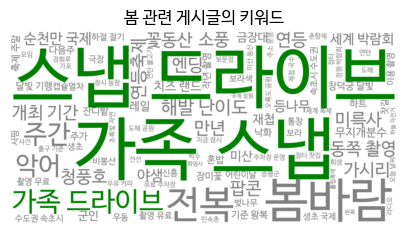

In [172]:
from wordcloud import WordCloud
highlighted_words = ["Ïä§ÎÉÖ ÎìúÎùºÏù¥Î∏å","Í∞ÄÏ°± Ïä§ÎÉÖ","Í∞ÄÏ°± ÎìúÎùºÏù¥Î∏å"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "Green"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(season_list[0])
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('Î¥Ñ Í¥ÄÎ†® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()

In [173]:
highlighted_words = ["Î¨ºÎÜÄÏù¥","ÏÑúÌïë","ÏõåÌÑ∞ÌååÌÅ¨","Î£®ÏßÄ","Î†àÏ†Ä",]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ

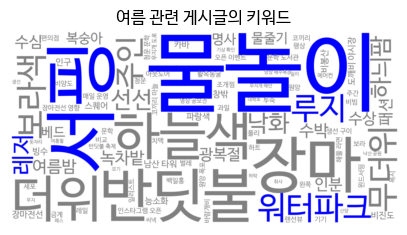

In [174]:
highlighted_words = ["Î¨ºÎÜÄÏù¥","ÏÑúÌïë","ÏõåÌÑ∞ÌååÌÅ¨","Î£®ÏßÄ","Î†àÏ†Ä",]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
        
from wordcloud import WordCloud
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(season_list[1])
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('Ïó¨Î¶Ñ Í¥ÄÎ†® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()

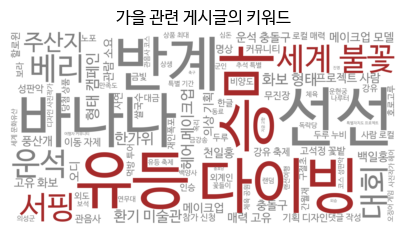

In [175]:
from wordcloud import WordCloud
highlighted_words = ["Ïú†Îì±","ÏäπÎßà","Îã§Ïù¥Îπô","ÏÑ∏Í≥Ñ Î∂àÍΩÉ","ÏÑúÌïë"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "Brown"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(season_list[2])
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('Í∞ÄÏùÑ Í¥ÄÎ†® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()

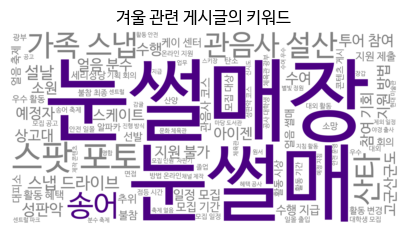

In [176]:
from wordcloud import WordCloud
highlighted_words = ["ÎààÏç∞Îß§Ïû•","ÎààÏç∞Îß§","ÏÜ°Ïñ¥"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "Indigo"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ
wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(season_list[3])
wordCloud.words_
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
plt.imshow(wordCloud,interpolation='bilinear')
plt.title('Í≤®Ïö∏ Í¥ÄÎ†® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
plt.axis('off')
plt.show()

## ÏßÄÏó≠Î≥Ñ ÌÇ§ÏõåÎìú Î∂ÑÏÑù
|ÏßÄÏó≠|Îì±Ïû• ÌÇ§ÏõåÎìú|Í¥ÄÎ†® Í¥ÄÍ¥ëÏßÄ|
|--|--|--|
Í≤ΩÍ∏∞|Ïû¨Ïù∏ Ìè≠Ìè¨, ÎØºÏÜçÏ¥å, Ìò∏Î°ú Í≥†Î£®, Î≥ÑÎπõ Ï†ïÏõê, Ïó∞Î¨¥ÎåÄ|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ, Î¨∏Ìôî Í¥ÄÍ¥ëÏßÄ|
Í∞ïÏõê|ÏÑúÌïë, Ïç∞Îß§, ÏÜ°Ïñ¥,ÏäπÎßà|Î†àÏ†Ä Ïä§Ìè¨Ï∏†|
Í≤ΩÎ∂Å|ÏÑºÌä∏Îü¥ ÌååÌÅ¨,Ï£ºÏÇ∞ÏßÄ,Î∂ÑÌô©ÏÇ¨,Î∂ÄÏÑùÏÇ¨|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ, Î¨∏Ìôî Í¥ÄÍ¥ëÏßÄ|
Í≤ΩÎÇ®|ÌÜµÎèÑÏÇ¨,Ïö¥ÏÑù Ï∂©ÎèåÍµ¨,ÎπÑÏßÑÎèÑ|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ, Î¨∏Ìôî Í¥ÄÍ¥ëÏßÄ|
Ï∂©ÎÇ®|Ï≤≠ÏÇ∞ ÏàòÎ™©Ïõê,ÏÑ∏Î¶¨ ÏÑ±Îãπ,ÏñºÏùå Î∂ÑÏàò Ï∂ïÏ†ú,ÎûúÎìú Î™©Ïû•,ÏÑ∏Í≥Ñ Î∞ïÎûåÌöå|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ, Î¨∏Ìôî Í¥ÄÍ¥ëÏßÄ|
Ï∂©Î∂Å|ÌôúÏò• ÎèôÍµ¥,Ï≤≠ÌíçÌò∏Î∞ò, ÎπÑÎ¥âÏÇ∞|ÏûêÏó∞Í¥ÄÍ¥ëÏßÄ|
Î∂ÄÏÇ∞|ÏÑúÌïë,Ï∫°Ïäê Ïó¥Ï∞®,Ïó∞Îì±Ï∂ïÏ†ú,ÏïºÍ≤Ω Ìà¨Ïñ¥,ÏÇ∞ÌÉÄ Î≤ÑÏä§,Ïò§Î•ôÎèÑ Í≥µÏõê|Ï∂ïÏ†ú, Î†àÏ†Ä Ïä§Ìè¨Ï∏†, Î¨∏Ìôî Í¥ÄÍ¥ëÏßÄ|
Ïù∏Ï≤ú|ÏäπÎ¥âÎèÑ,ÏùÑÏôïÎ¶¨,ÏÑ†ÎÖÄ Î∞îÏúÑ,ÌíÄÎì±,ÏÑúÌíçÎ∞õÏù¥|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
ÏÑúÏö∏|ÏÑ∏Í≥Ñ Î∂àÍΩÉ Ï∂ïÏ†ú,ÎπõÏ¥àÎ°± Ï∂ïÏ†ú, ÎèÑÍπ®ÎπÑ ÏïºÏãúÏû•,Ï∞ΩÎçïÍ∂Å,ÏõîÎìú ÌÉÄÏõå,Î¨¥ÏßÄÍ∞ú Î∂ÑÏàò|Ï∂ïÏ†ú, Î¨∏Ìôî Í¥ÄÍ¥ëÏßÄ|
ÎåÄÏ†Ñ|Ïä§Ïπ¥Ïù¥Ïõ®Ïù¥,Ìú¥ÏñëÎ¶º,ÌòïÏ†ú Î∞îÏúÑ|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
ÎåÄÍµ¨|Í≥±Ï∞Ω Í≥®Î™©,ÏπòÎß• ÌéòÏä§Ìã∞Î≤å, Ïó∞ÌÉÑ Î∂àÍ≥†Í∏∞|ÏùåÏãù|
Í¥ëÏ£º|ÏßÄÏÇ∞ Ïú†ÏõêÏßÄ, ÏÇ¨ÏßÅ Í≥µÏõê, Ï§ëÏô∏ Í≥µÏõê|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
ÏÑ∏Ï¢Ö|Ïò•ÏÉÅÏ†ïÏõê,ÏÇ∞Î¶º Î∞ïÎ¨ºÍ¥Ä, ÏàòÎ™©Ïõê|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
Ï†ÑÎÇ®|ÏπòÏ¶à ÎûúÎìú, Í≥†ÌïòÎèÑ, ÎÖπÏ∞®Î∞≠,Î∞±ÏñëÏÇ¨|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
Ï†ÑÎ∂Å|Î∞òÎîßÎ∂à,ÎÇôÌôî,Í≥†Íµ∞ÏÇ∞ Íµ∞ÎèÑ|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
Ï†úÏ£º|Í¥ÄÏùåÏÇ¨, ÏÑ±ÌåêÏïÖ, ÎπÑÏñëÎèÑ|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|
Ïö∏ÏÇ∞|ÎåÄÏôïÏïî Í≥µÏõê,Í∞ÑÏõîÏû¨, ÏÑ†Î∞îÏúÑ, ÏûêÏàòÏ†ï ÎèôÍµ¥|ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄ|

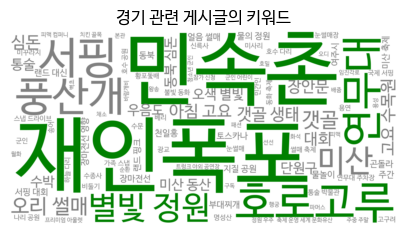

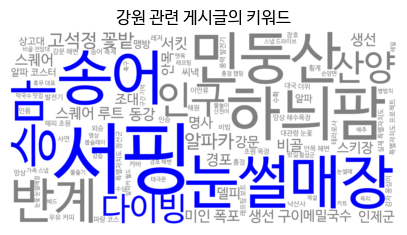

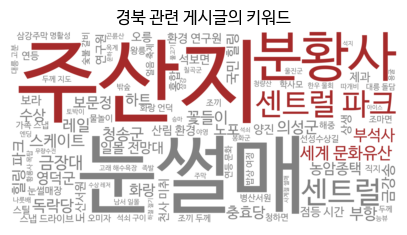

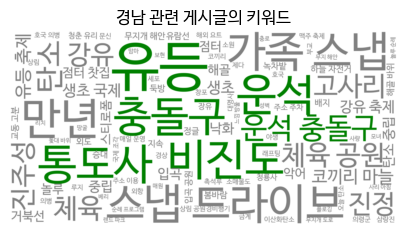

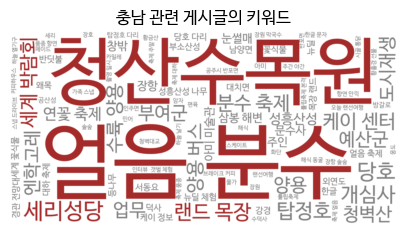

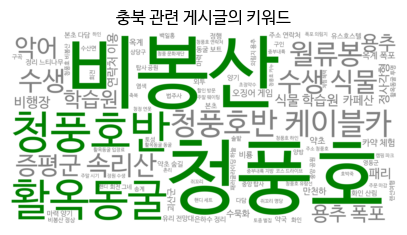

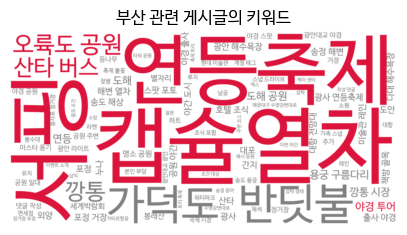

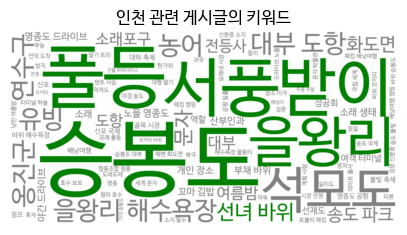

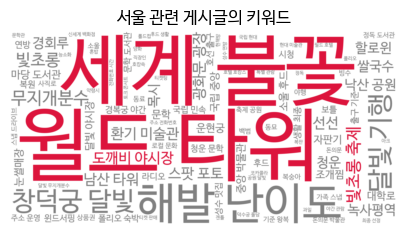

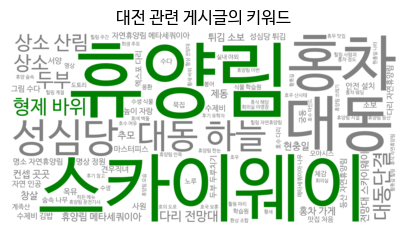

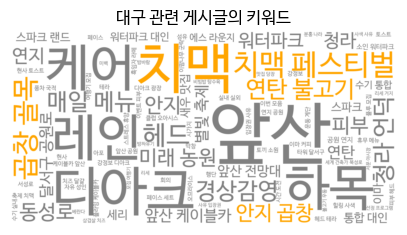

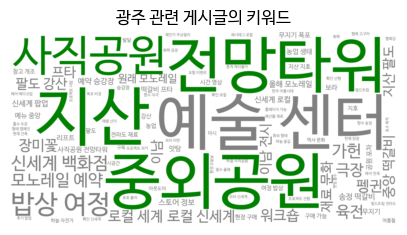

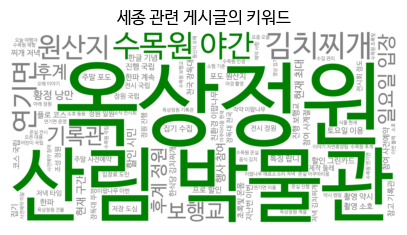

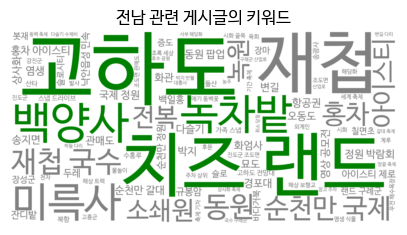

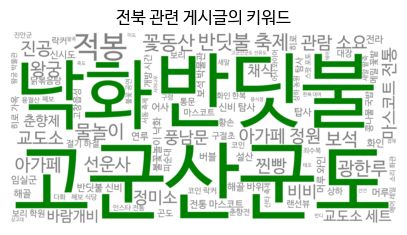

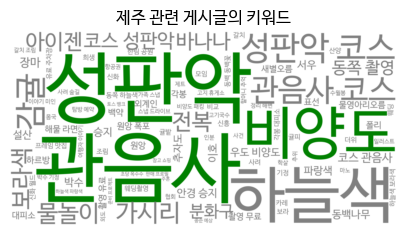

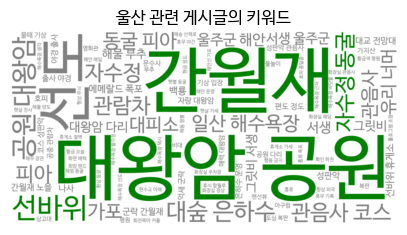

In [186]:
highlighted_words = [["Ïû¨Ïù∏Ìè≠Ìè¨","ÎØºÏÜçÏ¥å","Ìò∏Î°úÍ≥†Î£®", "Î≥ÑÎπõ Ï†ïÏõê","Ïó∞Î¨¥ÎåÄ"],["ÎààÏç∞Îß§Ïû•","ÏÑúÌïë","Ïç∞Îß§","ÏÜ°Ïñ¥","ÏäπÎßà","Îã§Ïù¥Îπô"],["ÏÑ∏Í≥Ñ Î¨∏ÌôîÏú†ÏÇ∞","ÏÑºÌä∏Îü¥ ÌååÌÅ¨","Ï£ºÏÇ∞ÏßÄ","Î∂ÑÌô©ÏÇ¨","Î∂ÄÏÑùÏÇ¨"],["Ïú†Îì±","ÌÜµÎèÑÏÇ¨","Ïö¥ÏÑù Ï∂©ÎèåÍµ¨","ÎπÑÏßÑÎèÑ","Ïö¥ÏÑù","Ï∂©ÎèåÍµ¨"],["Ï≤≠ÏÇ∞ÏàòÎ™©Ïõê","ÏÑ∏Î¶¨ÏÑ±Îãπ","ÏñºÏùå Î∂ÑÏàò","ÎûúÎìú Î™©Ïû•","ÏÑ∏Í≥Ñ Î∞ïÎûåÌöå"],["ÌôúÏò•ÎèôÍµ¥","Ï≤≠ÌíçÌò∏Î∞ò","ÎπÑÎ¥âÏÇ∞","Ï≤≠ÌíçÌò∏"],["ÏÑúÌïë","Ï∫°ÏäêÏó¥Ï∞®","Ïó∞Îì±Ï∂ïÏ†ú","ÏïºÍ≤Ω Ìà¨Ïñ¥","ÏÇ∞ÌÉÄ Î≤ÑÏä§","Ïò§Î•ôÎèÑ Í≥µÏõê"],["ÏäπÎ¥âÎèÑ",'ÏùÑÏôïÎ¶¨','ÏÑ†ÎÖÄ Î∞îÏúÑ','ÌíÄÎì±','ÏÑúÌíçÎ∞õÏù¥'],['ÏÑ∏Í≥Ñ Î∂àÍΩÉ','ÎπõÏ¥àÎ°± Ï∂ïÏ†ú','ÎèÑÍπ®ÎπÑ ÏïºÏãúÏû•','Ï∞ΩÎçïÍ∂Å','ÏõîÎìú ÌÉÄÏõå','Î¨¥ÏßÄÍ∞ú Î∂ÑÏàò'],['Ïä§Ïπ¥Ïù¥Ïõ®Ïù¥','Ìú¥ÏñëÎ¶º','ÌòïÏ†ú Î∞îÏúÑ'],['ÏïàÏßÄ Í≥±Ï∞Ω','ÏπòÎß•','Í≥±Ï∞Ω Í≥®Î™©','ÏπòÎß• ÌéòÏä§Ìã∞Î≤å','Ïó∞ÌÉÑ Î∂àÍ≥†Í∏∞'],['ÏßÄÏÇ∞','ÏÇ¨ÏßÅÍ≥µÏõê','Ï§ëÏô∏Í≥µÏõê','Ï†ÑÎßùÌÉÄÏõå'],['Ïò•ÏÉÅÏ†ïÏõê','ÏÇ∞Î¶º Î∞ïÎ¨ºÍ¥Ä','ÏàòÎ™©Ïõê ÏïºÍ∞Ñ','ÏàòÎ™©Ïõê'],['ÏπòÏ¶à ÎûúÎìú','Í≥†ÌïòÎèÑ','ÎÖπÏ∞®Î∞≠','Î∞±ÏñëÏÇ¨'],['Î∞òÎîßÎ∂à','ÎÇôÌôî','Í≥†Íµ∞ÏÇ∞Íµ∞ÎèÑ'],['Í¥ÄÏùåÏÇ¨','ÏÑ±ÌåêÏïÖ','ÎπÑÏñëÎèÑ'],['ÎåÄÏôïÏïî Í≥µÏõê','Í∞ÑÏõîÏû¨','ÏÑ†Î∞îÏúÑ','ÏûêÏàòÏ†ï ÎèôÍµ¥']]
color_list = ["Green","Blue","Brown","Green","Brown","Green","Crimson","Green","Crimson","Green","Orange","Green","Green","Green","Green","Green","Green",]
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
for i in range(len(region_list)):
    def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in highlighted_words[i]:
            return color_list[i]  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
        else:
            return "gray"   
    wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(region_list[i])
    wordCloud.words_
    plt.figure(figsize=(5, 10))
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.title(region[i] + ' Í¥ÄÎ†® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú')
    plt.axis('off')
    plt.show()

In [161]:
highlighted_words = ["ÎààÏç∞Îß§Ïû•","Ïç∞Îß§","Îã§Ïù¥Îπô","ÏäπÎßà","ÏÜ°Ïñ¥","ÏÑúÌïë"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # ÌäπÏ†ï Îã®Ïñ¥ ÏÉâÏÉÅ
    else:
        return "gray"   # ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥ ÏÉâÏÉÅ

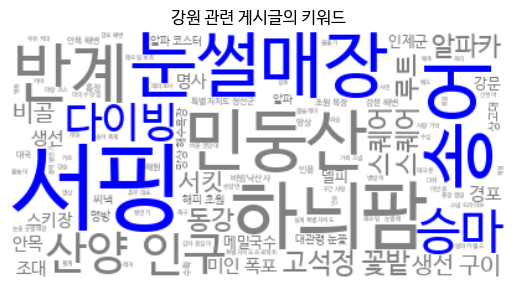

In [109]:
from wordcloud import WordCloud
wordCloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(region_list[1])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.title(region[1]+" Í¥ÄÎ†® Í≤åÏãúÍ∏ÄÏùò ÌÇ§ÏõåÎìú")
plt.axis('off')
plt.show()

## ÍΩÉÍ≥º Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÏùò ÏõîÎ≥Ñ ÎπàÎèÑÏàò
- Î¥Ñ, Í∞ÄÏùÑÏóê ÎπàÎèÑ Ïàò Ï¶ùÍ∞Ä

In [34]:
 pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')

flower_check
card_month              
1                   40.0
10                 136.0
11                 110.0
12                  47.0
2                   52.0
3                  188.0
4                  188.0
5                   76.0
6                   64.0
7                   59.0
8                   72.0
9                   86.0

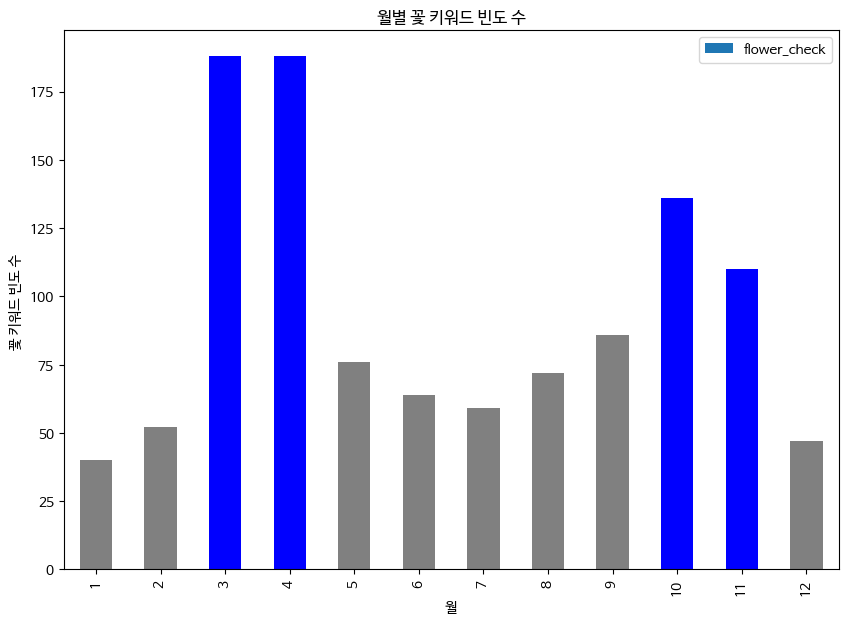

In [59]:
flower_count = pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')
flower_count = flower_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# concept Í∞íÏù¥ 0Ïù∏ Ìñâ Ï†úÍ±∞
# Í∑∏ÎûòÌîÑ Ï†úÎ™©, xÏ∂ï Î†àÏù¥Î∏î, yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax = flower_count.plot(kind='bar', figsize=(10, 7))
for patch in ax.patches:
    patch.set_facecolor('grey')

# Ï≤´ Î≤àÏß∏ÏôÄ Îëê Î≤àÏß∏ ÎßâÎåÄÎ•º ÌååÎûÄÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
ax.patches[2].set_facecolor('Blue')
ax.patches[3].set_facecolor('Blue')
ax.patches[9].set_facecolor('Blue')
ax.patches[10].set_facecolor('Blue')
plt.title('ÏõîÎ≥Ñ ÍΩÉ ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('ÍΩÉ ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò ')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

## Ï∂ïÏ†úÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÏùò ÏõîÎ≥Ñ ÎπàÎèÑÏàò
- Î¥Ñ, Í∞ÄÏùÑÏóê ÎπàÎèÑ Ïàò Ï¶ùÍ∞Ä

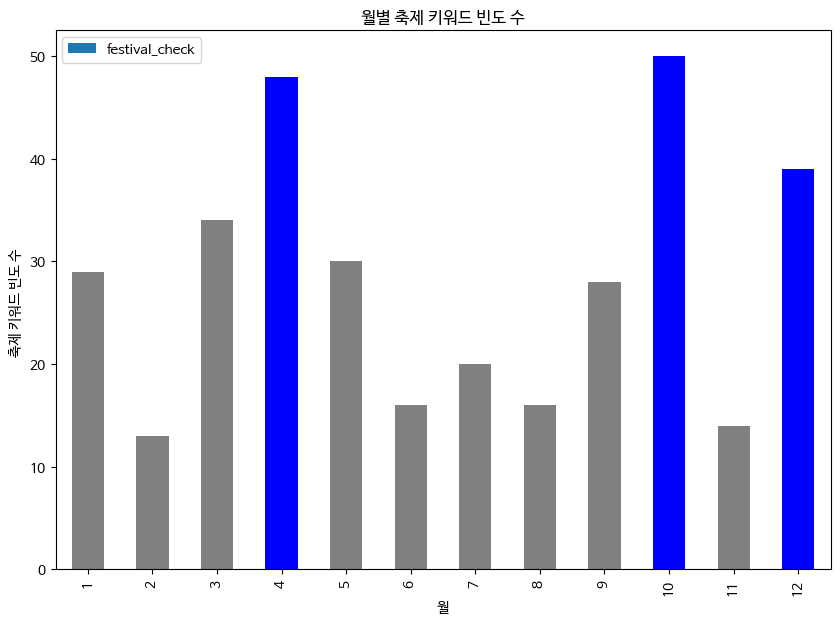

In [60]:
festival_count = pd.pivot_table(df_sns_title, index = "card_month",values="festival_check",aggfunc='sum')
festival_count = festival_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# concept Í∞íÏù¥ 0Ïù∏ Ìñâ Ï†úÍ±∞
# Í∑∏ÎûòÌîÑ Ï†úÎ™©, xÏ∂ï Î†àÏù¥Î∏î, yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax = festival_count.plot(kind='bar', figsize=(10, 7))
for patch in ax.patches:
    patch.set_facecolor('grey')

# Ï≤´ Î≤àÏß∏ÏôÄ Îëê Î≤àÏß∏ ÎßâÎåÄÎ•º ÌååÎûÄÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
ax.patches[3].set_facecolor('Blue')
ax.patches[9].set_facecolor('Blue')
ax.patches[11].set_facecolor('Blue')
plt.title('ÏõîÎ≥Ñ Ï∂ïÏ†ú ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Ï∂ïÏ†ú ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò ')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# Í≤∞Î°†
1. Í≥ÑÏ†à
    - Î¥Ñ, Í∞ÄÏùÑÏùò Í≤ΩÏö∞ ÍΩÉÏù¥ÎÇò Ï∂ïÏ†úÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏù¥ Ïñ∏Í∏â
    - Ïó¨Î¶Ñ, Í∞ÄÏùÑ, Í≤®Ïö∏ÏóêÎäî Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏù¥ Ïñ∏Í∏â

2. ÏßÄÏó≠
    - ÎåÄÎ∂ÄÎ∂ÑÏùò ÏßÄÏó≠ÏóêÏÑú ÏûêÏó∞ Í¥ÄÍ¥ëÏßÄÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏù¥ Ïñ∏Í∏â
    - ÏÑúÏö∏Ïùò Í≤ΩÏö∞ Ï∂ïÏ†úÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏù¥ Îì±Ïû•
    - Î∂ÄÏÇ∞Ïùò Í≤ΩÏö∞, Îã§ÏñëÌïú ÌÇ§ÏõåÎìúÍ∞Ä Îì±Ïû•
    - ÎåÄÍµ¨Ïùò Í≤ΩÏö∞, ÏùåÏãùÍ≥º Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏù¥ Îì±Ïû•
    - Í∞ïÏõêÏùò Í≤ΩÏö∞ Î†àÏ†Ä Ïä§Ìè¨Ï∏†ÏôÄ Í¥ÄÎ†®Îêú ÌÇ§ÏõåÎìúÍ∞Ä ÎßéÏù¥ Îì±Ïû•